In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

#**I- VERSION CHATGPT**

In [ ]:
# VERSION CHATGPT


# Paramètres de l'investissement
capital_initial = 100000  # Capital total à investir
mois_investissement = 12  # Nombre de mois pour DCA
somme_par_mois = capital_initial / mois_investissement  # Somme investie chaque mois soit 8333,33€
etf_ticker = "^GSPC"  # Ticker pour le S&P 500

# Définir la période d'investissement : on commence il y a 10 ans
date_debut = datetime.now() - relativedelta(months=121)  # Il y a 10 ans et 1 mois pour avoir la variation du rendmeent pour le 1er mois.
date_fin = datetime.now()

# Télécharger les données historiques du S&P 500 pour cette période
etf_data = yf.download(etf_ticker, start=date_debut, end=date_fin, interval="1mo")

# Sélection des données de prix de clôture ajusté (adjusted close)
prix_cloture = etf_data['Adj Close']

# Calcul des rendements mensuels (en %)
rendements_mensuels = prix_cloture.pct_change()


# Diviser en 2 périodes : 12 mois d'investissement (DCA) et le reste pour la fructification
rendements_investissement = rendements_mensuels[:mois_investissement+1]  # Rendements pendant la phase de DCA soit 12 mois/ Je mets +1 car je ne sais pas pourquoi ça s'arrête à 11
rendements_fructification = rendements_mensuels[mois_investissement:]  # Rendements pendant la phase de fructification soit 10 ans - 12 mois


# Initialiser les variables
valeur_portefeuille = 0
quantite_totale = 0

# Simuler l'investissement DCA
for i, rendement in enumerate(rendements_investissement): # "enumerate" : récupère dans une liste de "tuple" le numéro de l'itération avec son élément associé à l'itération.
    print(i, rendement)
    if not np.isnan(rendement):  # Ignorer les premiers mois sans rendement
        quantite_achetee = somme_par_mois / prix_cloture[i]  # Nombre de parts achetées chaque mois
        quantite_totale += quantite_achetee
        valeur_portefeuille = quantite_totale * prix_cloture[i]  # Valeur du portefeuille après achat
        print(valeur_portefeuille)

# Fructifier l'investissement avec la performance du S&P 500
valeur_portefeuille_historique = []

for i, rendement in enumerate(rendements_fructification, start=mois_investissement):
    if not np.isnan(rendement):
        valeur_portefeuille *= (1 + rendement)  # Appliquer le rendement mensuel à la valeur du portefeuille
        valeur_portefeuille_historique.append(valeur_portefeuille)

# Afficher les résultats
print(f"Valeur finale du portefeuille après 10 ans : {valeur_portefeuille:.2f} €")

# Visualiser la performance
dates = prix_cloture.index[mois_investissement + 1:]  # Les dates correspondant à la période de fructification
plt.plot(dates, valeur_portefeuille_historique, label="Portefeuille (DCA)")
plt.xlabel('Date')
plt.ylabel('Valeur du portefeuille (€)')
plt.title("Évolution de la valeur du portefeuille (DCA sur ETF S&P 500)")
plt.legend()
plt.show()


[*********************100%***********************]  1 of 1 completed

0 nan
1 0.02453358864631494
8333.333333333334
2 -0.004188587515997044
16631.761770700024
3 -0.031040805838410623
24448.831816158356
4 0.0548925108906233
34124.22291622318
5 -0.017396107114219572
41863.927612516396
6 0.008520819822535275
50553.975930099645
7 0.010491382304589791
59417.69035193269
8 -0.021011671979729973
66502.55866579805
9 0.019742029435184882
76148.78746982667
10 -0.06258081825586559
79716.66737410624
11 -0.026442831280001466
85942.06632186209
12 0.08298311781266654
101407.1402698465



<ipython-input-19-7eacb7ff4cdc>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  quantite_achetee = somme_par_mois / prix_cloture[i]  # Nombre de parts achetées chaque mois
<ipython-input-19-7eacb7ff4cdc>:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  valeur_portefeuille = quantite_totale * prix_cloture[i]  # Valeur du portefeuille après achat


'\n# Fructifier l\'investissement avec la performance du S&P 500\nvaleur_portefeuille_historique = []\n\nfor i, rendement in enumerate(rendements_fructification, start=mois_investissement):\n    if not np.isnan(rendement):\n        valeur_portefeuille *= (1 + rendement)  # Appliquer le rendement mensuel à la valeur du portefeuille\n        valeur_portefeuille_historique.append(valeur_portefeuille)\n\n# Afficher les résultats\nprint(f"Valeur finale du portefeuille après 10 ans : {valeur_portefeuille:.2f} €")\n\n# Visualiser la performance\ndates = prix_cloture.index[mois_investissement + 1:]  # Les dates correspondant à la période de fructification\nplt.plot(dates, valeur_portefeuille_historique, label="Portefeuille (DCA)")\nplt.xlabel(\'Date\')\nplt.ylabel(\'Valeur du portefeuille (€)\')\nplt.title("Évolution de la valeur du portefeuille (DCA sur ETF S&P 500)")\nplt.legend()\nplt.show()\n'

#**II- VERSION MOI**

In [ ]:
# 1) LES VARIABLES
temps_investissement = 10 # Temps en année
somme_investie = 100000 # En €
mois_dca = 12 # En mois
ticker = "^GSPC" # Nom de l'actif financier


# 2) CALCUL DU RENDEMENT DURANT LA PERIODE DE DCA
# Somme à investir par mois
somme_par_mois = somme_investie / mois_dca

# Création des dates de début et fin d'investissement (exemple pour 10 ans)
date_debut = datetime.now() - relativedelta(months=((temps_investissement*12)+1)) # Il y a 10 ans et 1 mois pour avoir la variation du rendmeent pour le 1er mois.
date_fin = datetime.now()

# Récupération des données financière pour la durée de l'investissement
data_financiere = yf.download(ticker, start=date_debut, end=date_fin, interval="1mo")

# Récupération des rendements mensuels
rendements_mois = data_financiere['Adj Close'].pct_change()


# 3) CALCUL DU RENDEMENT DCA
# Calcul du rendement sur le DCA
valeur_portefeuille_dca = 0
for i in rendements_mois[1:mois_dca+1]: # On ajoute 1 pour décaler de un mois pour avoir un calcul de rendement. Sinon pas de rendement au mois 0
  valeur_portefeuille_dca += somme_par_mois * (1 + i)

# Calcul du reste de l'investissement après le DCA
for i in rendements_mois[mois_dca-1:]:
  valeur_portefeuille_dca *= (1 + i)

# Affichage du résultat
print(f"\n La valeur du porte-feuille après {temps_investissement} ans d'investissement via DCA sera de : {round(valeur_portefeuille_dca, 0)} €")


# 4) CALCUL DU RENDEMENT lUMPSUM
for i in rendements_mois[1:]:
  somme_investie *= (1 + i)

# Affichage du résultat
print(f"\n La valeur du porte-feuille après {temps_investissement} ans d'investissement via LumpSum sera de : {round(somme_investie, 0)} €")

[*********************100%***********************]  1 of 1 completed


 La valeur du porte-feuille après 10 ans d'investissement via DCA sera de : 294020.0 €

 La valeur du porte-feuille après 10 ans d'investissement via LumpSum sera de : 286418.0 €


#**III- VERSION MOI AVEC FONCTION**

In [ ]:
# 1) LES VARIABLES
temps_investissement = 10 # Temps en année
somme_investie = 100000 # En €
mois_dca = 12 # En mois
ticker = "^GSPC" # Nom de l'actif financier


def calcul_rendement(temps_investissement, somme_investie, mois_dca, ticker):
  # 2) CALCUL DU RENDEMENT DURANT LA PERIODE DE DCA
  # Somme à investir par mois
  somme_par_mois = somme_investie / mois_dca

  # Création des dates de début et fin d'investissement (exemple pour 10 ans)
  date_debut = datetime.now() - relativedelta(months=((temps_investissement*12)+1)) # Il y a 10 ans et 1 mois pour avoir la variation du rendmeent pour le 1er mois.
  date_fin = datetime.now()

  # Récupération des données financière pour la durée de l'investissement
  data_financiere = yf.download(ticker, start=date_debut, end=date_fin, interval="1mo")

  # Récupération des rendements mensuels
  rendements_mois = data_financiere['Adj Close'].pct_change()


  # 3) CALCUL DU RENDEMENT DCA
  # Calcul du rendement sur le DCA
  valeur_portefeuille_dca = 0
  for i in rendements_mois[1:mois_dca+1]: # On ajoute 1 pour décaler de un mois pour avoir un calcul de rendement. Sinon pas de rendement au mois 0
    valeur_portefeuille_dca += somme_par_mois * (1 + i)

  # Calcul du reste de l'investissement après le DCA
  for i in rendements_mois[mois_dca-1:]:
    valeur_portefeuille_dca *= (1 + i)

  # Affichage du résultat
  print(f"\n La valeur du porte-feuille après {temps_investissement} ans d'investissement via DCA sera de : {round(valeur_portefeuille_dca, 0)} €")


  # 4) CALCUL DU RENDEMENT lUMPSUM
  for i in rendements_mois[1:]:
    somme_investie *= (1 + i)

  # Affichage du résultat
  print(f"\n La valeur du porte-feuille après {temps_investissement} ans d'investissement via LumpSum sera de : {round(somme_investie, 0)} €")


calcul_rendement(temps_investissement=16, somme_investie=100000, mois_dca=6, ticker="^GSPC")

[*********************100%***********************]  1 of 1 completed


 La valeur du porte-feuille après 16 ans d'investissement via DCA sera de : 780484.0 €

 La valeur du porte-feuille après 16 ans d'investissement via LumpSum sera de : 600570.0 €


#**IV- VERSION MOI AVEC FONCTION ET ITERATION DUREE**

In [ ]:
# 1) LES VARIABLES
temps_investissement = 10 # Temps en année
somme_investie = 100000 # En €
mois_dca = 12 # En mois
ticker = "^GSPC" # Nom de l'actif financier


def calcul_rendement(temps_investissement, somme_investie, mois_dca, ticker):
  # 2) CALCUL DU RENDEMENT DURANT LA PERIODE DE DCA
  # Somme à investir par mois
  somme_par_mois = somme_investie / mois_dca

  # Création des dates de début et fin d'investissement (exemple pour 10 ans)
  date_debut = datetime.now() - relativedelta(months=((temps_investissement*12)+1)) # Il y a 10 ans et 1 mois pour avoir la variation du rendmeent pour le 1er mois.
  date_fin = datetime.now()

  # Récupération des données financière pour la durée de l'investissement
  data_financiere = yf.download(ticker, start=date_debut, end=date_fin, interval="1mo")

  # Récupération des rendements mensuels
  rendements_mois = data_financiere['Adj Close'].pct_change()


  # 3) CALCUL DU RENDEMENT DCA
  # Calcul du rendement sur le DCA
  valeur_portefeuille_dca = 0
  for i in rendements_mois[1:mois_dca+1]: # On ajoute 1 pour décaler de un mois pour avoir un calcul de rendement. Sinon pas de rendement au mois 0
    valeur_portefeuille_dca += somme_par_mois * (1 + i)

  # Calcul du reste de l'investissement après le DCA
  for i in rendements_mois[mois_dca-1:]:
    valeur_portefeuille_dca *= (1 + i)

  # Affichage du résultat
  print(f"\n La valeur du porte-feuille après {temps_investissement} ans d'investissement via DCA sera de : {round(valeur_portefeuille_dca, 0)} €")


  # 4) CALCUL DU RENDEMENT lUMPSUM
  for i in rendements_mois[1:]:
    somme_investie *= (1 + i)

  # Affichage du résultat
  print(f"\n La valeur du porte-feuille après {temps_investissement} ans d'investissement via LumpSum sera de : {round(somme_investie, 0)} €")


for i in range(1,25):
  calcul_rendement(temps_investissement=10, somme_investie=100000, mois_dca=12, ticker="^GSPC")

[*********************100%***********************]  1 of 1 completed


 La valeur du porte-feuille après 10 ans d'investissement via DCA sera de : 294020.0 €

 La valeur du porte-feuille après 10 ans d'investissement via LumpSum sera de : 286418.0 €


""


[*********************100%***********************]  1 of 1 completed


 La valeur du porte-feuille après 10 ans d'investissement via DCA sera de : 294020.0 €

 La valeur du porte-feuille après 10 ans d'investissement via LumpSum sera de : 286418.0 €


""


[*********************100%***********************]  1 of 1 completed


 La valeur du porte-feuille après 10 ans d'investissement via DCA sera de : 294020.0 €

 La valeur du porte-feuille après 10 ans d'investissement via LumpSum sera de : 286418.0 €


""


[*********************100%***********************]  1 of 1 completed


 La valeur du porte-feuille après 10 ans d'investissement via DCA sera de : 294020.0 €

 La valeur du porte-feuille après 10 ans d'investissement via LumpSum sera de : 286418.0 €


""


[*********************100%***********************]  1 of 1 completed



 La valeur du porte-feuille après 10 ans d'investissement via DCA sera de : 294020.0 €

 La valeur du porte-feuille après 10 ans d'investissement via LumpSum sera de : 286418.0 €


""


[*********************100%***********************]  1 of 1 completed


 La valeur du porte-feuille après 10 ans d'investissement via DCA sera de : 294020.0 €

 La valeur du porte-feuille après 10 ans d'investissement via LumpSum sera de : 286418.0 €


""


[*********************100%***********************]  1 of 1 completed


 La valeur du porte-feuille après 10 ans d'investissement via DCA sera de : 294020.0 €

 La valeur du porte-feuille après 10 ans d'investissement via LumpSum sera de : 286418.0 €


""


[*********************100%***********************]  1 of 1 completed


 La valeur du porte-feuille après 10 ans d'investissement via DCA sera de : 294020.0 €

 La valeur du porte-feuille après 10 ans d'investissement via LumpSum sera de : 286418.0 €


""


[*********************100%***********************]  1 of 1 completed


 La valeur du porte-feuille après 10 ans d'investissement via DCA sera de : 294020.0 €

 La valeur du porte-feuille après 10 ans d'investissement via LumpSum sera de : 286418.0 €


""


[*********************100%***********************]  1 of 1 completed


 La valeur du porte-feuille après 10 ans d'investissement via DCA sera de : 294020.0 €

 La valeur du porte-feuille après 10 ans d'investissement via LumpSum sera de : 286418.0 €


""


[*********************100%***********************]  1 of 1 completed


 La valeur du porte-feuille après 10 ans d'investissement via DCA sera de : 294020.0 €

 La valeur du porte-feuille après 10 ans d'investissement via LumpSum sera de : 286418.0 €


""


[*********************100%***********************]  1 of 1 completed


 La valeur du porte-feuille après 10 ans d'investissement via DCA sera de : 294020.0 €

 La valeur du porte-feuille après 10 ans d'investissement via LumpSum sera de : 286418.0 €


""


[*********************100%***********************]  1 of 1 completed



 La valeur du porte-feuille après 10 ans d'investissement via DCA sera de : 294020.0 €

 La valeur du porte-feuille après 10 ans d'investissement via LumpSum sera de : 286418.0 €


""


[*********************100%***********************]  1 of 1 completed


 La valeur du porte-feuille après 10 ans d'investissement via DCA sera de : 294020.0 €

 La valeur du porte-feuille après 10 ans d'investissement via LumpSum sera de : 286418.0 €


""


[*********************100%***********************]  1 of 1 completed


 La valeur du porte-feuille après 10 ans d'investissement via DCA sera de : 294020.0 €

 La valeur du porte-feuille après 10 ans d'investissement via LumpSum sera de : 286418.0 €


""


[*********************100%***********************]  1 of 1 completed


 La valeur du porte-feuille après 10 ans d'investissement via DCA sera de : 294020.0 €

 La valeur du porte-feuille après 10 ans d'investissement via LumpSum sera de : 286418.0 €


""


[*********************100%***********************]  1 of 1 completed


 La valeur du porte-feuille après 10 ans d'investissement via DCA sera de : 294020.0 €

 La valeur du porte-feuille après 10 ans d'investissement via LumpSum sera de : 286418.0 €


""


[*********************100%***********************]  1 of 1 completed


 La valeur du porte-feuille après 10 ans d'investissement via DCA sera de : 294020.0 €

 La valeur du porte-feuille après 10 ans d'investissement via LumpSum sera de : 286418.0 €


""


[*********************100%***********************]  1 of 1 completed


 La valeur du porte-feuille après 10 ans d'investissement via DCA sera de : 294020.0 €

 La valeur du porte-feuille après 10 ans d'investissement via LumpSum sera de : 286418.0 €


""


[*********************100%***********************]  1 of 1 completed


 La valeur du porte-feuille après 10 ans d'investissement via DCA sera de : 294020.0 €

 La valeur du porte-feuille après 10 ans d'investissement via LumpSum sera de : 286418.0 €


""


[*********************100%***********************]  1 of 1 completed


 La valeur du porte-feuille après 10 ans d'investissement via DCA sera de : 294020.0 €

 La valeur du porte-feuille après 10 ans d'investissement via LumpSum sera de : 286418.0 €


""


[*********************100%***********************]  1 of 1 completed


 La valeur du porte-feuille après 10 ans d'investissement via DCA sera de : 294020.0 €

 La valeur du porte-feuille après 10 ans d'investissement via LumpSum sera de : 286418.0 €


""


[*********************100%***********************]  1 of 1 completed


 La valeur du porte-feuille après 10 ans d'investissement via DCA sera de : 294020.0 €

 La valeur du porte-feuille après 10 ans d'investissement via LumpSum sera de : 286418.0 €


""


[*********************100%***********************]  1 of 1 completed


 La valeur du porte-feuille après 10 ans d'investissement via DCA sera de : 294020.0 €

 La valeur du porte-feuille après 10 ans d'investissement via LumpSum sera de : 286418.0 €


""


#**V- VERSION MOI AVEC FONCTION ET ITERATION DUREE MOI CHATGPT + DATAFRAME**

In [ ]:
# Fonction pour calculer les rendements
def calcul_rendement(temps_investissement, somme_investie, mois_dca, ticker):
    # Somme à investir par mois
    somme_par_mois = somme_investie / mois_dca

    # Définir les dates de début et de fin
    date_debut = datetime.now() - relativedelta(months=((temps_investissement * 12) + 1))
    date_fin = datetime.now()

    # Télécharger les données financières pour la période
    data_financiere = yf.download(ticker, start=date_debut, end=date_fin, interval="1mo")

    # Calculer les rendements mensuels
    rendements_mois = data_financiere['Adj Close'].pct_change()

    # Calcul du rendement DCA
    valeur_portefeuille_dca = 0
    for i in rendements_mois[1:mois_dca+1]:
        valeur_portefeuille_dca += somme_par_mois * (1 + i)

    for i in rendements_mois[mois_dca-1:]:
        valeur_portefeuille_dca *= (1 + i)

    # Calcul du rendement LumpSum
    valeur_portefeuille_lumpsum = somme_investie
    for i in rendements_mois[1:]:
        valeur_portefeuille_lumpsum *= (1 + i)

    return round(valeur_portefeuille_dca, 0), round(valeur_portefeuille_lumpsum, 0)

# Variables pour les différents DCA et durées
dca_list = [6, 12, 18, 24]
durations = range(1, 26)  # De 1 à 25 ans

# Créer un tableau pour stocker les résultats
resultats = {'Année': [], 'DCA (6 mois)': [], 'DCA (12 mois)': [], 'DCA (18 mois)': [], 'DCA (24 mois)': [], 'LumpSum': []}

# Calculer les rendements pour chaque combinaison de durée et de DCA
for duree in durations:
    resultats['Année'].append(duree)

    # Stocker les résultats pour chaque DCA
    for dca_mois in dca_list:
        dca_value, lump_value = calcul_rendement(temps_investissement=duree, somme_investie=100000, mois_dca=dca_mois, ticker="^GSPC")
        resultats[f'DCA ({dca_mois} mois)'].append(dca_value)

    # Le calcul LumpSum est le même pour toutes les durées, donc on l'exécute une fois pour chaque durée
    _, lump_value = calcul_rendement(temps_investissement=duree, somme_investie=100000, mois_dca=12, ticker="^GSPC")  # Peu importe la valeur de `mois_dca` ici
    resultats['LumpSum'].append(lump_value)

# Convertir le dictionnaire en DataFrame
df_resultats = pd.DataFrame(resultats)

# Afficher les résultats sous forme de tableau
display(df_resultats)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

,Année,DCA (6 mois),DCA (12 mois),DCA (18 mois),DCA (24 mois),LumpSum
0,1,117725.0,105838.0,68537.0,51402.0,138658.0
1,2,148425.0,129971.0,115882.0,104780.0,150182.0
2,3,130713.0,145197.0,145904.0,128683.0,126266.0
3,4,159051.0,132384.0,134828.0,148291.0,177832.0
4,5,196137.0,167521.0,155589.0,131018.0,191438.0
5,6,212029.0,200817.0,197999.0,167708.0,214439.0
6,7,215380.0,201392.0,210581.0,200246.0,225804.0
7,8,250783.0,239071.0,216951.0,202522.0,273500.0
8,9,300789.0,268454.0,247974.0,237433.0,279655.0
9,10,277941.0,295799.0,301539.0,268585.0,288151.0


#**VI- VISUALISATION LINEPLOT**

In [ ]:
# Visualisation avec Seaborn
sns.set(style="whitegrid")

# Création de sous-graphiques pour visualiser les différentes périodes de DCA
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_resultats, x="Année", y="DCA (6 mois)", linestyle="--", marker="o", label="DCA (6 mois)")
sns.lineplot(data=df_resultats, x="Année", y="DCA (12 mois)", linestyle="--", marker="o", label="DCA (12 mois)")
sns.lineplot(data=df_resultats, x="Année", y="DCA (18 mois)", linestyle="--", marker="o", label="DCA (18 mois)")
sns.lineplot(data=df_resultats, x="Année", y="DCA (24 mois)", linestyle="--", marker="o", label="DCA (24 mois)")
sns.lineplot(data=df_resultats, x="Année", y="LumpSum", color="black", linestyle="--", marker="o", label="Lump Sum")

# Configuration du graphique
plt.title("Comparaison des rendements DCA vs Lump Sum sur différentes périodes")
plt.xlabel("Durée de l'investissement (ans)")
plt.ylabel("Valeur finale (€)")
plt.legend(title="Méthode d'investissement")
plt.grid(True)

# Affichage
plt.show()

#**VII- VISUALISATION BARPLOT AVEC REFORMATAGE EN "pd.melt"**

,Année,Stratégie,Investissement
0,1,DCA (6 mois),117725.0
1,2,DCA (6 mois),148425.0
2,3,DCA (6 mois),130713.0
3,4,DCA (6 mois),159051.0
4,5,DCA (6 mois),196137.0
...,...,...,...
120,21,LumpSum,553438.0
121,22,LumpSum,656502.0
122,23,LumpSum,548702.0
123,24,LumpSum,406816.0


<ipython-input-8-7e4efc570d11>:34: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_long, x='Année', y='Investissement', hue='Stratégie', palette='Set2', ci=None)


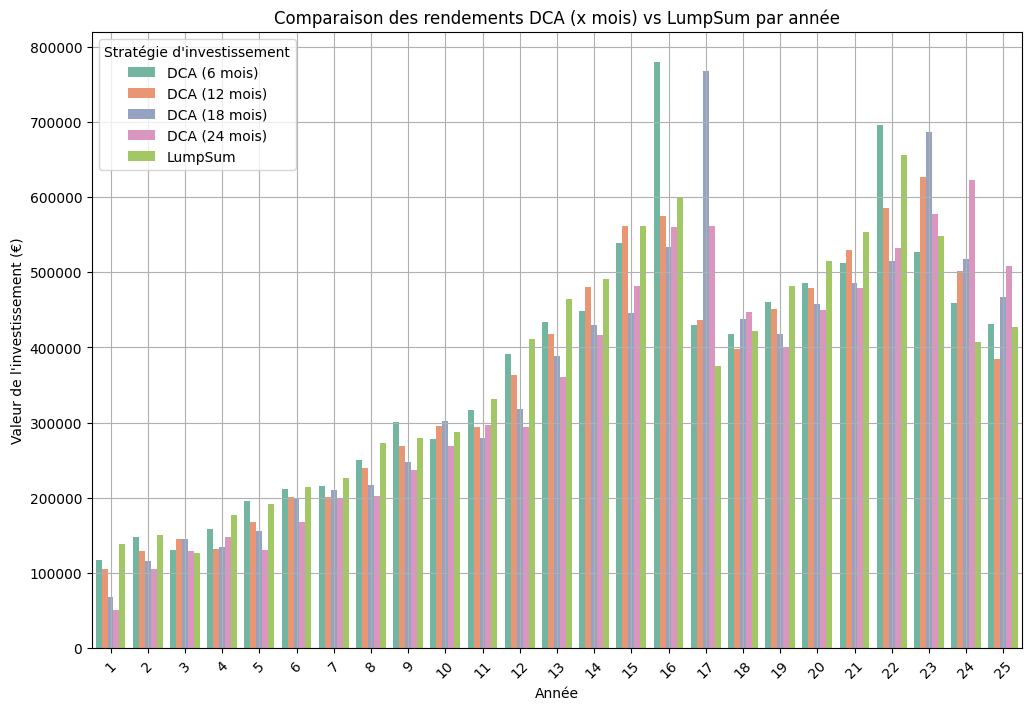

In [ ]:
# Reformater le DataFrame avec pd.melt
'''
La fonction pd.melt() de Pandas est utilisée pour « fondre » un DataFrame en un format plus long. Voici tous les paramètres disponibles :

Paramètres de pd.melt() :
- frame (DataFrame obligatoire) : Le DataFrame d'entrée que tu souhaites fondre.

- id_vars (liste, tuple ou chaîne) : Colonnes qui ne seront pas « fondues ». Ce sont les colonnes qui resteront intactes dans
le DataFrame fondu, telles que des identifiants uniques ou des colonnes de catégories (ex. "Année", "Nom", etc.).

- value_vars (liste, tuple ou chaîne, optionnel) :Les colonnes que tu souhaites fondre. Si ce paramètre est omis,
toutes les colonnes qui ne sont pas dans id_vars seront fondues.

- var_name (chaîne, optionnel) : Nom de la colonne qui contiendra les noms des colonnes de value_vars.
Par défaut, la colonne est appelée variable.

- value_name (chaîne, optionnel) : Nom de la colonne qui contiendra les valeurs des colonnes de value_vars.
Par défaut, la colonne est appelée value.

- col_level (int ou chaîne, optionnel) : Si le DataFrame possède des colonnes multi-indexées (MultiIndex),
ce paramètre permet de spécifier à quel niveau appliquer la fonction melt(). Par défaut, il est défini sur None,
ce qui signifie qu'il s'applique à tous les niveaux.

- ignore_index (bool, optionnel) : Si True (par défaut), réinitialise l'index dans le DataFrame fondu.
Si False, l'index d'origine est conservé.
'''

df_long = pd.melt(frame=df_resultats, id_vars=['Année'], value_vars=['DCA (6 mois)','DCA (12 mois)','DCA (18 mois)','DCA (24 mois)', 'LumpSum'],
                  var_name='Stratégie', value_name='Investissement')
display(df_long)

# Créer le graphique
plt.figure(figsize=(12, 8))
sns.barplot(data=df_long, x='Année', y='Investissement', hue='Stratégie', palette='Set2', ci=None)

# Configuration du graphique
plt.title("Comparaison des rendements DCA (x mois) vs LumpSum par année")
plt.xlabel("Année")
plt.ylabel("Valeur de l'investissement (€)")
plt.legend(title="Stratégie d'investissement")
plt.xticks(rotation=45)  # Rotation de l'axe X si nécessaire
plt.grid(True)

# Affichage du graphique
plt.show()

,Année,Stratégie,Investissement
0,1,DCA (6 mois),117725.0
1,2,DCA (6 mois),148425.0
2,3,DCA (6 mois),130713.0
3,4,DCA (6 mois),159051.0
4,5,DCA (6 mois),196137.0
5,6,DCA (6 mois),212029.0
6,7,DCA (6 mois),215380.0
7,8,DCA (6 mois),250783.0
8,9,DCA (6 mois),300789.0
9,10,DCA (6 mois),277941.0


<ipython-input-7-359aff864d3a>:34: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_long, x='Année', y='Investissement', hue='Stratégie', palette='Set2', ci=None)


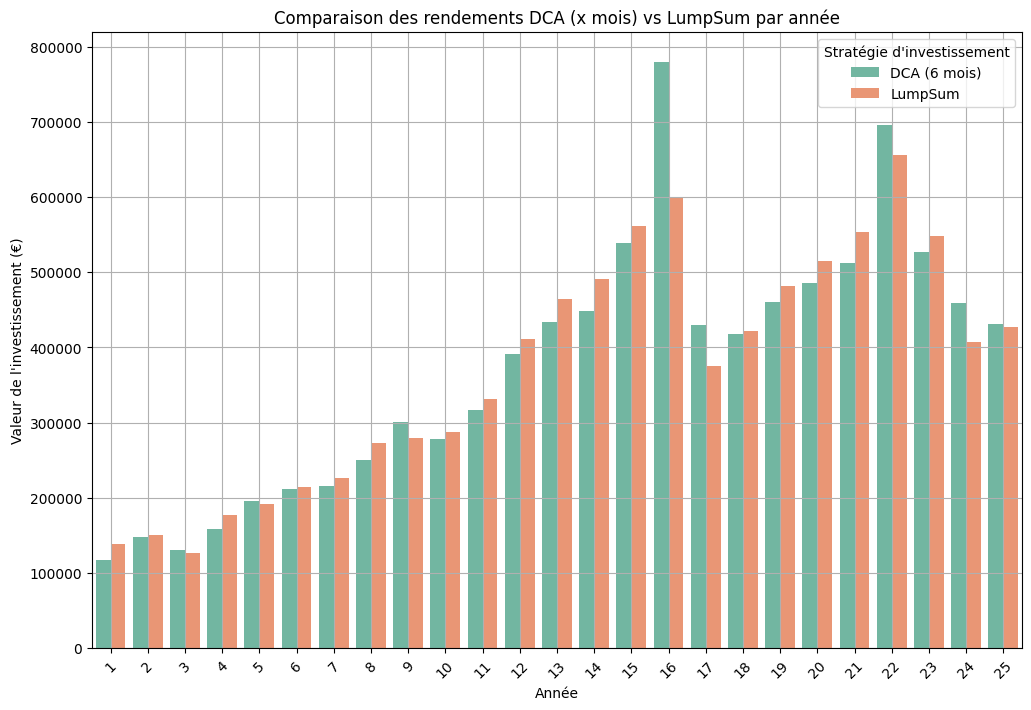

In [ ]:
# Reformater le DataFrame avec pd.melt
'''
La fonction pd.melt() de Pandas est utilisée pour « fondre » un DataFrame en un format plus long. Voici tous les paramètres disponibles :

Paramètres de pd.melt() :
- frame (DataFrame obligatoire) : Le DataFrame d'entrée que tu souhaites fondre.

- id_vars (liste, tuple ou chaîne) : Colonnes qui ne seront pas « fondues ». Ce sont les colonnes qui resteront intactes dans
le DataFrame fondu, telles que des identifiants uniques ou des colonnes de catégories (ex. "Année", "Nom", etc.).

- value_vars (liste, tuple ou chaîne, optionnel) :Les colonnes que tu souhaites fondre. Si ce paramètre est omis,
toutes les colonnes qui ne sont pas dans id_vars seront fondues.

- var_name (chaîne, optionnel) : Nom de la colonne qui contiendra les noms des colonnes de value_vars.
Par défaut, la colonne est appelée variable.

- value_name (chaîne, optionnel) : Nom de la colonne qui contiendra les valeurs des colonnes de value_vars.
Par défaut, la colonne est appelée value.

- col_level (int ou chaîne, optionnel) : Si le DataFrame possède des colonnes multi-indexées (MultiIndex),
ce paramètre permet de spécifier à quel niveau appliquer la fonction melt(). Par défaut, il est défini sur None,
ce qui signifie qu'il s'applique à tous les niveaux.

- ignore_index (bool, optionnel) : Si True (par défaut), réinitialise l'index dans le DataFrame fondu.
Si False, l'index d'origine est conservé.
'''

df_long = pd.melt(frame=df_resultats, id_vars=['Année'], value_vars=['DCA (6 mois)', 'LumpSum'],
                  var_name='Stratégie', value_name='Investissement')
display(df_long)

# Créer le graphique
plt.figure(figsize=(12, 8))
sns.barplot(data=df_long, x='Année', y='Investissement', hue='Stratégie', palette='Set2', ci=None)

# Configuration du graphique
plt.title("Comparaison des rendements DCA (x mois) vs LumpSum par année")
plt.xlabel("Année")
plt.ylabel("Valeur de l'investissement (€)")
plt.legend(title="Stratégie d'investissement")
plt.xticks(rotation=45)  # Rotation de l'axe X si nécessaire
plt.grid(True)

# Affichage du graphique
plt.show()